In [1]:
import pandas as pd
%pylab inline
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv("RedditShortDemoSurvey-1-Cleaned.csv")

In [3]:
#We will now look at the labels of the columns
df.columns

Index([u'Entry Id', u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Treated country data',
       u'(For U. S. redditors) In which state do you live?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?', u'Unnamed: 14',
       u'Unnamed: 15', u'Unnamed: 16', u'Unnamed: 17', u'Unnamed: 18',
       u'Unnamed: 19'],
      dtype='object')

In [4]:
df.head(25)

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(32754, 20)

In [6]:
#We will now remove the unwanted/undefined columns which 
del df['Unnamed: 14']
del df['Unnamed: 15']
del df['Unnamed: 16'] 
del df['Unnamed: 17'] 
del df['Unnamed: 18']
del df['Unnamed: 19']

In [7]:
#Now again check the columns after removing unwanted columns
df.columns

Index([u'Entry Id', u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Treated country data',
       u'(For U. S. redditors) In which state do you live?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?'],
      dtype='object')

In [8]:
#For the ease of using columns further, let's rename them
df = df.rename(columns = {
    'Entry Id':'Entry_Id',
    'Please indicate your gender.':'Gender',
    'What is your marital status?':'Marital_status',
    'What best describes your employment status?':'Employment_status' ,   
    'Please select the category that includes your age.':'Age_category',
    'Are you or have you ever been in military service?':'Military_service',
    'Do you currently have children under the age of 18 living in your household?':'Children_under_18',
    'What best describes your level of education?':'Education_Level',
    'Treated country data':'Country_treated',
    '(For U. S. redditors) In which state do you live?':'State_Residing',
    'Which one of the following ranges includes your total yearly household income before taxes?':'Yearly_Houshold_income',
    'treated subreddit data':'Subreddit_data_treated', 
    'Are you a dog or a cat person?':'Dog_or_cat_person',
    'If you were a cheese, what cheese would you be?':'Cheese_type'
    
    })

In [9]:
#Lets check the columns with new names
df.columns

Index([u'Entry_Id', u'Gender', u'Age_category', u'Marital_status',
       u'Employment_status', u'Military_service', u'Children_under_18',
       u'Education_Level', u'Country_treated', u'State_Residing',
       u'Yearly_Houshold_income', u'Subreddit_data_treated',
       u'Dog_or_cat_person', u'Cheese_type'],
      dtype='object')

Let's start with the EDA for countries and aggregate all countries to their continents

In [10]:
df.Country_treated.value_counts()

United States                       20967
Canada                               2888
United Kingdom                       1782
Australia                            1051
Germany                               407
New Zealand                           315
Sweden                                309
Norway                                288
Ireland                               242
Finland                               188
Denmark                               182
none                                  177
India                                 154
France                                142
The Netherlands                       141
Netherlands                           134
Belgium                               119
Poland                                112
Brazil                                111
Mexico                                108
Spain                                 100
canada                                 97
Portugal                               87
Switzerland                       

In [11]:
Australia=['Austrailia','Ozstralia','Australi','Ozstralia','Austrailia','Australia','australia','Australia','australia','Australi','austria',
           'Austraila','AUSTRALIA','Australia','Austria', 'australia','AUSTRALIA', 
           'Austrailia', 'Austraila','Ozstralia','Australi','austria','Fiji','Papua New Guinea'] 

North_America=['United States (Guam)','United States','canada','Trinidad and TObago','Commonwealth of the Northern Mariana Islands',
               'Republic of the Marshall Islands','united states of America ','Amurika',
               'Belgium/Canada','america','haiti','United Strate','Canada, Eh','United s',
               'The Dominion of Canada','Ontario, Canada','united states (my state is APO) ',
               'Mx','Mexico','mexico','Canada, Bitches.','United States of America (Washington, DC)',
               'United States of America (WASHINGTON DC, Y U NO LISTED?)','US OF A','U.S','USA ','California',
               "United States (apparently I can't put D.C. as my state)",'united states', 'united states :f',
               'United States, District of Columbia','U S A','USVI','america','united Sr','Idaho'
               ,'Canada (currently Korea)','Canada','CANADA','Norway','United states of America.','Costa Rica','M\xc3\xa9xico','Barbados','Canada, eh?',
                'United states of America', 'United States of ','United States of America (DC)','Trinidad & Tobago',
                'Belize','Dominion of Canada', 'Toronto','El Salvador','Canadia','Trinidad and Tobago',
                'Cayman Islands','Amerikka', 'Guatemala','United States ', 'US','united stateds','Amerikka', 'Guatemala','MEXICO  ',
               'United States of America: Guam. No option for territories :(','United states',
                'Sint Maarten','united sates','The United States of America','Usa', 'United st','Mexico ',
                'united States','Unnited States','Bahamas',' Canada','canada ', 'United States of America ', 
                'United States Of America', 'Guam', 'usa','greenland','Camada','U.S.A.','Canda','Unites States','Panama',
              'United Sates','Canada ','united states of america','United States of America', 'Cananda',
              'United States of American','United States (Washington, DC)','united states of American', 
               'Nicaragua','MEXICO','USA',' Canada eh']

South_America=['brazil','Brasil','chile','Uruguay ','venezuela','Chile','Argentina','Bolivia','Brazil','Colombia','Ecuador',
               'French Guiana','Guyana','Paraguay','Peru','Suriname','argentina','colombia','Venezuela','ecuador','Brazilf','Uruguay']

Europe=['United kingom','United kingdom ','Croatua','switzerland','ITALY IT','england','England','SPAIN','Itaky',
        'Scotland and Sweden','NORWAY', 'DENMARK',
       'United kingdom of great britain and northern Ireland','Unitd Kingdom',
        'british virgin islands','BG','Denmark ','Serbia','serbia','UNited Kingdom','Galiza','The Netherlands','Netherlands, the',
       'Belgrium', 'slovenia','united kingdom / scotland', 'United Kingdom of Great Britain','uk','Czech republic',
        'United Kingdo,','Great Britian ','the Netherlands (a.k.a. Holland)',
        'Slovak Republic','Norway.','Australia and United Kingdom','IRELAND','England (United Kingdom is not a country)',
        'Bosnia And Herzegovina','Catalonia','new Zealand ','Newzealand ', 'FUNLAND','Belgrium','slovenia',
        'Republic of Ireland','Republic of Ireland ','BELGIUM','Peoples Republic of South Yorkshire',
        'United Kingdon', 'wales','norway', 'Swedeb','Netehrlands','Kingdom of Norway',
         'Holland','Federal Republic of Germany','United Kingdom (England)', 'United KIngdom',
        'England','Scotland','FRANCE','romania','Northern Ireland','sweden','Sweden',
        'Federal Republic of Germany','The NEtherlands','denmark','FUNLAND','Belgrium','Nether',
        'Commonwealth of the Northern Mariana Islands','Helsinki','U.K lol', 'scotland',
        'UK','U.K.','estonia','London United Kingdom','Frande','poland', 'U.K. Problem?',
        'Lithuania/United Kingdom','Kosova','Kosovo','U.K','United ','Denmark','United Kingdom','Belgium','Italy','italy','Romania',
           'Germany', 'France', 'Greece', 'Switzerland','Netherlands', 'Bulgaria', 'Spain', 'Poland', 'Finland',
         'the Netherlands','Slovenia','Iceland','Bosnia and Herzegovina','Croatia','united kingdom',
          'New Zealand','Estonia','Puerto Rico','Portugal','Slovakia','Ukraine', 'Macedonia','Czech Republic',
        'Lithuania','United Kingdom (Scotland)','Swiss','Bermuda','Dominica','United Jingdom', 'Gibraltar', 'ireland',
         'Hungary','Uninted Kingdom','Isle of Man','Luxembourg','Swedem','Wales', 'Latvia', 'POLAND',
           'u.k', 'United  Kingdom', 'spain', 'germany','new zealand','Equestria',
           'United Kingdom of Great Britain and Northern Ireland','Republic of Poland', 'Honduras','ENGLAND', 'GErmany', 'greece',  
         'Ger','finland','iceland','belgium', 'Sweden ','Republic Of Ireland','England ','Great Britain','New zealand', 'New Zealand ',
        'The United Kingdom of Great Britain and Northern Ireland','Albania',
        'Grand Duchy of Baden','United Kingdown','Faroe Islands','Portugal',
       'Untied Kingdom ', 'The Czech Republic','Montenegro','Antigua and Barbuda','United Kindom',' United Kingdom',
        'The Republic of Ireland', 'Australia ','Andorra','czech republic','Untied Kingdom','St.Vincent', 'Ireland ',
        'united kingdom of great Britain ','UNITED KINGDOM','united kingdom ','Unted Kingdom','New Zealanad','United Knigdom', 
        'Finland ', 'netherlands','The Netherlands ','Bosnia and Herzegowina','united kingdom, Spain ',
        'ITALY','croatia','Belarus','United Kingdom, India','Portugal ',
          'Ireland','United Kingdom ','Malta','france','United kingdom,England, United Kingdom','United kingdom',
            'England, United Kingdom','Germany ','Republic of Moldova','the netherlands',
            'United Kingdom of Great Britain & Northern Ireland','Frabce','Swden','Moldova']


Africa=['Kenya','Madagascar','Mozambique','Réunion','kenya','Algeria','Egypt','Libyan Arab Jamahiriya','Morocco','Tunisia','Western Sahara','Burundi'
        ,'Comoros','Djibouti','Eritrea','Ethiopia','Malawi','Mauritius','Mayotte',
        'Rwanda','Somalia','Sudan','Uganda','Nigeria','Senegal','United Republic of Tanzania','Zambia',
        'Zimbabwe','Angola','Cameroon','Central African Republic','Chad','Congo','Democratic Republic of the Congo',
        'Equatorial Guinea','Gabon','Sao Tome and Principe','Botswana','Lesotho','Namibia','South Africa','Swaziland',
        'Benin','Burkina Faso','Cape Verde',"Côte d'Ivoire",'Gambia','Ghana','Guinea','Guinea-Bissau','Liberia','Mali',
        'Mauritania','Niger','Sierra Leone','Togo','Jamaica', 'Dominican Republic','south africa','Aruba','Tanzania']

Asia=['China','North Korea','kuwait','Hong Kong','Republic Of Korea (American Citizen)','Singapore ',"People's Republic of China",
      'INDIA','South Korea ','philippines','china','malaysia','Hong KOng','Hong Kong Special Administrative Region, China', 'ISRAEL',
      'PHIILIPPINES','TURKEY','israel', 'Lebanon ','Republic of Macedonia','Iraq, Kurdistan','india','MALAYSIA','Indiia',
      'israel', 'Lebanon ','Japan ','lebanon','turkey','taiwan','JAPAN','SIngapore',"People's Republic of China",'japan',
      'Iran','Armenia','Azerbaijan','Bahrain','Cyprus','Georgia','Iraq','Israel','Jordan','Kuwait','Lebanon','Occupied Palestinian Territory',
      'Oman','Qatar','Saudi Arabia','Syrian Arab Republic','Turkey','United Arab Emirates','Yemen','Afghanistan',
      'Bangladesh','Bhutan','Iran','Maldives','Nepal','Pakistan','Sri Lanka','Brunei Darussalam','Cambodia','Indonesia',
      "Lao People's Democratic Republic",'Malaysia','Myanmar','Philippines','Singapore','Thailand',
      'Timor-Leste','Viet Nam','China','Macao',"Democratic People's Republic of Korea",'Mongolia',
      'Republic of Korea','Kazakhstan','Kyrgyzstan','Tajikistan','Turkmenistan','Uzbekistan',
     'India','thailand','Korea, South','Japan','Hong','Brunei','Russia','Palestine', 'Taiwan',
      'Russian Federation','United Arab Emarites','South Korea','SINGAPORE!','singapore','Hong Kong',
      'Vietnam','Kuwait ','Kingdom of Saudi Arabia','SV','Hong Kong ','Brunei Darussalem']

Antarctica=['Antarctica']

In [12]:
"India" in pd.unique(Asia)

True

In [13]:
Continent = []
dumpList=[]
# For each row in the column,
for i in df['Country_treated']:
    cont=''
    try:
        cont=transformations.cn_to_ctn(i)
        Continent.append[cont]
    except:
        if(i in Europe):
            cont="Europe"
            Continent.append(cont)
        elif(i in North_America):
            cont="North America"
            Continent.append(cont)
        elif(i in South_America):
            cont="South America"
            Continent.append(cont)
        elif(i in Africa): 
            cont="Africa"
            Continent.append(cont)
        elif(i in Asia):
            cont="Asia"
            Continent.append(cont)
        elif(i in Antarctica):
            cont="Antarctica"
            Continent.append(cont)
        elif(i in Australia):
            cont="Australia"
            Continent.append(cont)
        else:
            cont="None"
            Continent.append(cont) 
            dumpList.append(i)

In [14]:
df['Continent'] = Continent
df[df.Continent=="None"]

,Entry_Id,Gender,Age_category,Marital_status,Employment_status,Military_service,Children_under_18,Education_Level,Country_treated,State_Residing,Yearly_Houshold_income,Subreddit_data_treated,Dog_or_cat_person,Cheese_type,Continent
189,190,Male,Under 18,Forever Alone,Student,Yes,No,Some high school,United states of America.,NaN,none,NaN,I like dogs.,Munster,None
401,402,Female,18-24,In a relationship,Employed full time,No,No,Some college,none,NaN,"$20,000 - $29,999",NaN,I like cats.,Other,None
911,912,Male,18-24,In a relationship,Student,No,No,Some college,none,NaN,"$30,000 - $39,999",NaN,I like turtles.,Goat,None
1045,1046,Male,18-24,In a relationship,Student,No,Yes,Bachelor's degree,none,NaN,none,NaN,I like dogs.,Munster,None
1103,1104,Male,Under 18,Single,Student,No,No,Some high school,none,NaN,none,NaN,I like dogs.,Munster,None
1187,1188,Male,25-34,Single,Student,No,No,Bachelor's degree,none,NaN,"Under $20,000",truereddit,I like dogs.,Munster,None
1565,1566,None,None,Forever Alone,None,Yes,None,None,none,NaN,"$70,000 - $99,999","tf2, ireland",I like dogs.,Goat,None
1895,1896,Male,18-24,In a relationship,Student,No,No,Graduate or professional degree,n,NaN,none,NaN,I like dogs.,Munster,None
2164,2165,Male,18-24,Forever Alone,Employed full time,No,No,High school graduate or equivalent,none,NaN,"$40,000 - $49,999",funny,I like cats.,Other,None
2337,2338,Male,25-34,In a relationship,Employed full time,No,No,Some college,none,NaN,none,NaN,I like dogs.,Munster,None


In [15]:
del df['Country_treated']
del df['State_Residing']

In [16]:
df

,Entry_Id,Gender,Age_category,Marital_status,Employment_status,Military_service,Children_under_18,Education_Level,Yearly_Houshold_income,Subreddit_data_treated,Dog_or_cat_person,Cheese_type,Continent
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,"$150,000 or more",getmotivated,none,none,North America
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,"$150,000 or more",gaming,none,none,North America
2,3,Female,18-24,Blank,Freelance,none,No,Some college,"Under $20,000",snackexchange,none,none,North America
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,"$150,000 or more",spacedicks,none,none,North America
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,"$70,000 - $99,999",aww,none,none,North America
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,"$150,000 or more",gaming,I like dogs.,Cheddar,North America
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,none,python,I like dogs.,Cheddar,Europe
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,North America
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,"$150,000 or more",todayilearned,I like cats.,Provolone,North America
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,"$70,000 - $99,999",NaN,I like cats.,Munster,Europe


In [17]:
df.columns

Index([u'Entry_Id', u'Gender', u'Age_category', u'Marital_status',
       u'Employment_status', u'Military_service', u'Children_under_18',
       u'Education_Level', u'Yearly_Houshold_income',
       u'Subreddit_data_treated', u'Dog_or_cat_person', u'Cheese_type',
       u'Continent'],
      dtype='object')

In [18]:
df[df.Entry_Id.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Employment_status,Military_service,Children_under_18,Education_Level,Yearly_Houshold_income,Subreddit_data_treated,Dog_or_cat_person,Cheese_type,Continent


In [19]:
df[df.Gender.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Employment_status,Military_service,Children_under_18,Education_Level,Yearly_Houshold_income,Subreddit_data_treated,Dog_or_cat_person,Cheese_type,Continent


In [20]:
df[df.Age_category.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Employment_status,Military_service,Children_under_18,Education_Level,Yearly_Houshold_income,Subreddit_data_treated,Dog_or_cat_person,Cheese_type,Continent


In [21]:
df[df.Marital_status.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Employment_status,Military_service,Children_under_18,Education_Level,Yearly_Houshold_income,Subreddit_data_treated,Dog_or_cat_person,Cheese_type,Continent


In [22]:
df[df.Employment_status.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Employment_status,Military_service,Children_under_18,Education_Level,Yearly_Houshold_income,Subreddit_data_treated,Dog_or_cat_person,Cheese_type,Continent


In [23]:
df[df.Military_service.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Employment_status,Military_service,Children_under_18,Education_Level,Yearly_Houshold_income,Subreddit_data_treated,Dog_or_cat_person,Cheese_type,Continent


In [24]:
df[df.Children_under_18.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Employment_status,Military_service,Children_under_18,Education_Level,Yearly_Houshold_income,Subreddit_data_treated,Dog_or_cat_person,Cheese_type,Continent


In [25]:
df[df.Education_Level.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Employment_status,Military_service,Children_under_18,Education_Level,Yearly_Houshold_income,Subreddit_data_treated,Dog_or_cat_person,Cheese_type,Continent


In [26]:
df[df.Yearly_Houshold_income.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Employment_status,Military_service,Children_under_18,Education_Level,Yearly_Houshold_income,Subreddit_data_treated,Dog_or_cat_person,Cheese_type,Continent


In [27]:
df[df.Subreddit_data_treated.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Employment_status,Military_service,Children_under_18,Education_Level,Yearly_Houshold_income,Subreddit_data_treated,Dog_or_cat_person,Cheese_type,Continent
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,"$70,000 - $99,999",NaN,I like cats.,Munster,Europe
13,14,Male,18-24,Forever Alone,Student,No,No,Some college,"Under $20,000",NaN,I like cats.,Swiss,Europe
29,30,Female,18-24,Forever Alone,Student,No,No,Some college,none,NaN,I like dogs.,American,North America
52,53,Male,25-34,Single,"Not employed, but looking for work",No,No,Bachelor's degree,"$70,000 - $99,999",NaN,I like cats.,Provolone,North America
61,62,Male,25-34,Single,Employed full time,Yes,No,Some college,"$20,000 - $29,999",NaN,I like cats.,Other,Europe
75,76,Male,35-44,Single,Freelance,No,No,Some college,"$70,000 - $99,999",NaN,I like cats.,Other,Europe
79,80,Male,25-34,Single,Employed full time,No,No,Bachelor's degree,"$40,000 - $49,999",NaN,I like cats.,Brie,North America
89,90,Male,18-24,Single,Student,No,No,Some college,"$150,000 or more",NaN,I like cats.,Brie,North America
103,104,Male,25-34,In a relationship,Student,No,No,Bachelor's degree,"$20,000 - $29,999",NaN,I like dogs.,Goat,North America
162,163,Female,25-34,Single,Student,No,No,Bachelor's degree,"Under $20,000",NaN,I like turtles.,Goat,North America


In [28]:
df['Subreddit_data_treated'].fillna('None',inplace=True)

In [29]:
df[df.Subreddit_data_treated.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Employment_status,Military_service,Children_under_18,Education_Level,Yearly_Houshold_income,Subreddit_data_treated,Dog_or_cat_person,Cheese_type,Continent


In [30]:
df[df.Dog_or_cat_person.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Employment_status,Military_service,Children_under_18,Education_Level,Yearly_Houshold_income,Subreddit_data_treated,Dog_or_cat_person,Cheese_type,Continent
2705,2706,Male,18-24,Single,"Not employed, but looking for work",No,No,Bachelor's degree,none,DROP TABLE `users`,NaN,1,Europe
30331,30334,Male,25-34,In a relationship,Employed full time,No,No,Bachelor's degree,"$70,000 - $99,999",DROP TABLE USERS,NaN,programming'),North America


In [31]:
df['Dog_or_cat_person'].fillna('none',inplace=True)

In [32]:
df[df.Dog_or_cat_person.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Employment_status,Military_service,Children_under_18,Education_Level,Yearly_Houshold_income,Subreddit_data_treated,Dog_or_cat_person,Cheese_type,Continent


In [33]:
df[df.Cheese_type.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Employment_status,Military_service,Children_under_18,Education_Level,Yearly_Houshold_income,Subreddit_data_treated,Dog_or_cat_person,Cheese_type,Continent


To Check for the bad values

In [34]:
df.Gender.value_counts()

Male      26418
Female     6135
None        201
Name: Gender, dtype: int64

In [35]:
df.Age_category.value_counts()

18-24          15802
25-34          11575
Under 18        2330
35-44           2257
45-54            502
55-64            140
None              88
65 or Above       60
Name: Age_category, dtype: int64

In [36]:
df.Marital_status.value_counts()

Single                                      10428
In a relationship                            9828
Forever Alone                                5850
Married/civil union/domestic partnership     5490
Engaged                                      1109
Widowed                                        44
Blank                                           5
Name: Marital_status, dtype: int64

In [37]:
df.Employment_status.value_counts()

Employed full time                       14814
Student                                  12987
Not employed, but looking for work        2087
Freelance                                 1948
Not employed and not looking for work      682
None                                       151
Retired                                     85
Name: Employment_status, dtype: int64

In [38]:
df.Military_service.value_counts()

No      30526
Yes      2223
none        5
Name: Military_service, dtype: int64

In [39]:
df.Children_under_18.value_counts()

No      27488
Yes      5047
None      219
Name: Children_under_18, dtype: int64

In [40]:
df.Education_Level.value_counts()

Bachelor's degree                     11046
Some college                           9600
Graduate or professional degree        4722
High school graduate or equivalent     3272
Some high school                       1924
Associate degree                       1411
Trade or Vocational degree              635
None                                    144
Name: Education_Level, dtype: int64

In [41]:
df.Yearly_Houshold_income.value_counts()

Under $20,000          7892
$50,000 - $69,999      4133
$70,000 - $99,999      4101
$100,000 - $149,999    3522
$20,000 - $29,999      3206
$30,000 - $39,999      2904
$150,000 or more       2695
$40,000 - $49,999      2686
none                   1615
Name: Yearly_Houshold_income, dtype: int64

In [42]:
df.Subreddit_data_treated.value_counts()

None                                             4335
askreddit                                        2123
fffffffuuuuuuuuuuuu                              1746
pics                                             1651
trees                                            1311
gaming                                           1207
funny                                            1092
atheism                                           839
askscience                                        779
all                                               647
todayilearned                                     645
starcraft                                         611
iama                                              576
minecraft                                         520
f7u12                                             515
programming                                       501
twoxchromosomes                                   396
science                                           378
truereddit                  

In [43]:
df.Dog_or_cat_person.value_counts()

I like dogs.       17149
I like cats.       11152
I like turtles.     4442
none                   7
askreddit              2
 Reddit.com            1
movies                 1
Name: Dog_or_cat_person, dtype: int64

In [44]:
df.loc[df['Dog_or_cat_person'] == 'I like turtles.', 'Dog_or_cat_person'] = 'none'
df.loc[df['Dog_or_cat_person'] == 'askreddit', 'Dog_or_cat_person'] = 'none'
df.loc[df['Dog_or_cat_person'] == ' Reddit.com', 'Dog_or_cat_person'] = 'none'
df.loc[df['Dog_or_cat_person'] == 'movies', 'Dog_or_cat_person'] = 'none'

In [45]:
df.Dog_or_cat_person.value_counts()

I like dogs.    17149
I like cats.    11152
none             4453
Name: Dog_or_cat_person, dtype: int64

In [46]:
df.Cheese_type.value_counts()

Other            6562
Cheddar          6101
Brie             3742
Provolone        3454
Swiss            3214
Feta             2991
Goat             2516
Munster          1770
American         1438
Paneer            618
Limburger         337
none                5
 f7u12              2
1                   1
programming')       1
 awww               1
 Pics               1
Name: Cheese_type, dtype: int64

In [47]:
df.loc[df['Cheese_type'] == ' awww', 'Cheese_type'] = 'none'
df.loc[df['Cheese_type'] == '1', 'Cheese_type'] = 'none'
df.loc[df['Cheese_type'] == "programming')", 'Cheese_type'] = 'none'
df.loc[df['Cheese_type'] == ' f7u12', 'Cheese_type'] = 'none'
df.loc[df['Cheese_type'] == " Pics", 'Cheese_type'] = 'none'

In [48]:
df.Cheese_type.value_counts()

Other        6562
Cheddar      6101
Brie         3742
Provolone    3454
Swiss        3214
Feta         2991
Goat         2516
Munster      1770
American     1438
Paneer        618
Limburger     337
none           11
Name: Cheese_type, dtype: int64

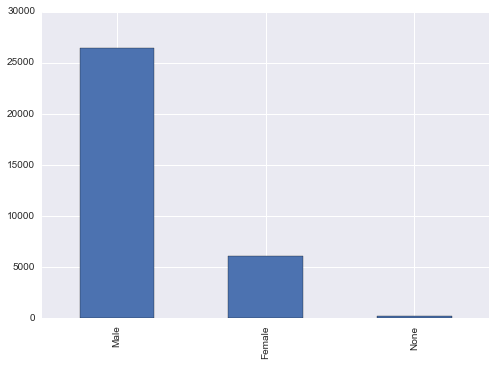

In [49]:
df.Gender.value_counts().plot(kind='bar')

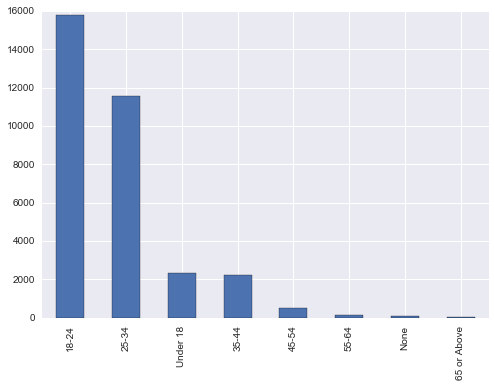

In [50]:
df.Age_category.value_counts().plot(kind='bar')

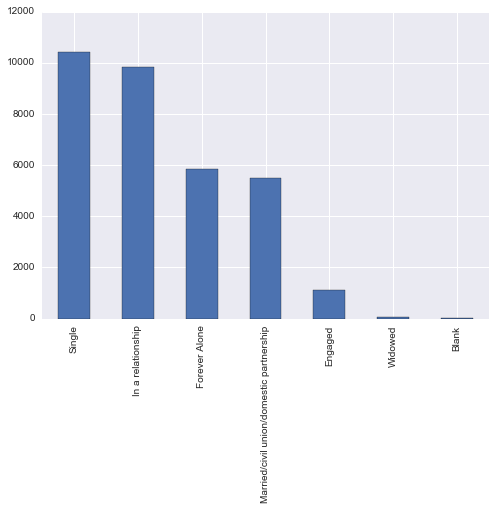

In [51]:
df.Marital_status.value_counts().plot(kind='bar')

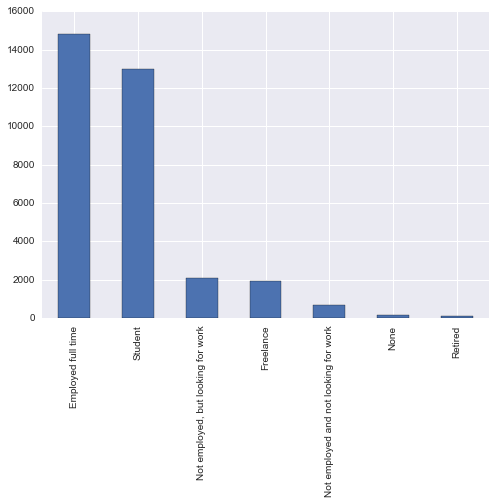

In [52]:
df.Employment_status.value_counts().plot(kind='bar')

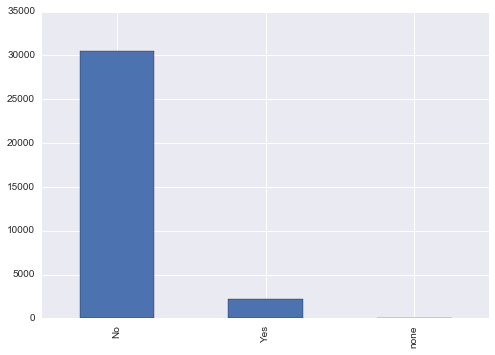

In [53]:
df.Military_service.value_counts().plot(kind='bar')

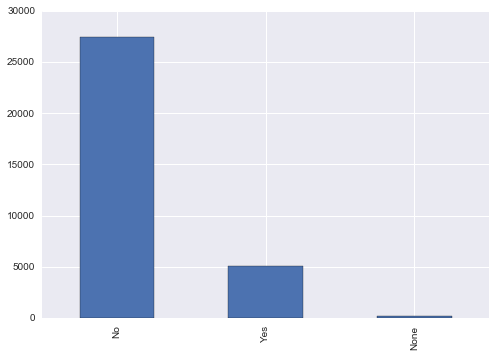

In [54]:
df.Children_under_18.value_counts().plot(kind='bar')

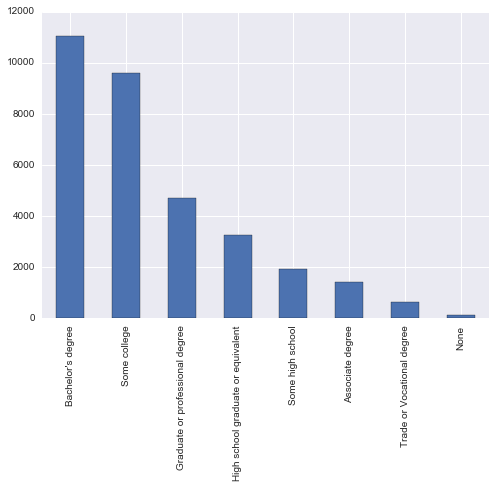

In [55]:
df.Education_Level.value_counts().plot(kind='bar')

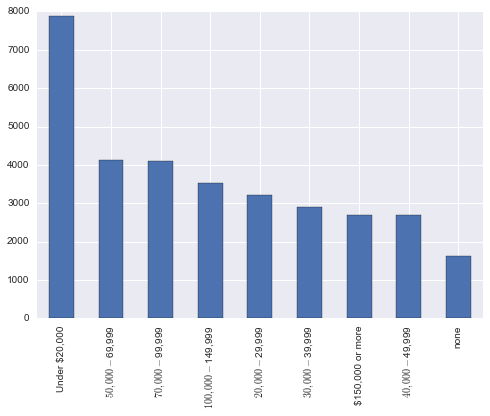

In [56]:
df.Yearly_Houshold_income.value_counts().plot(kind='bar')

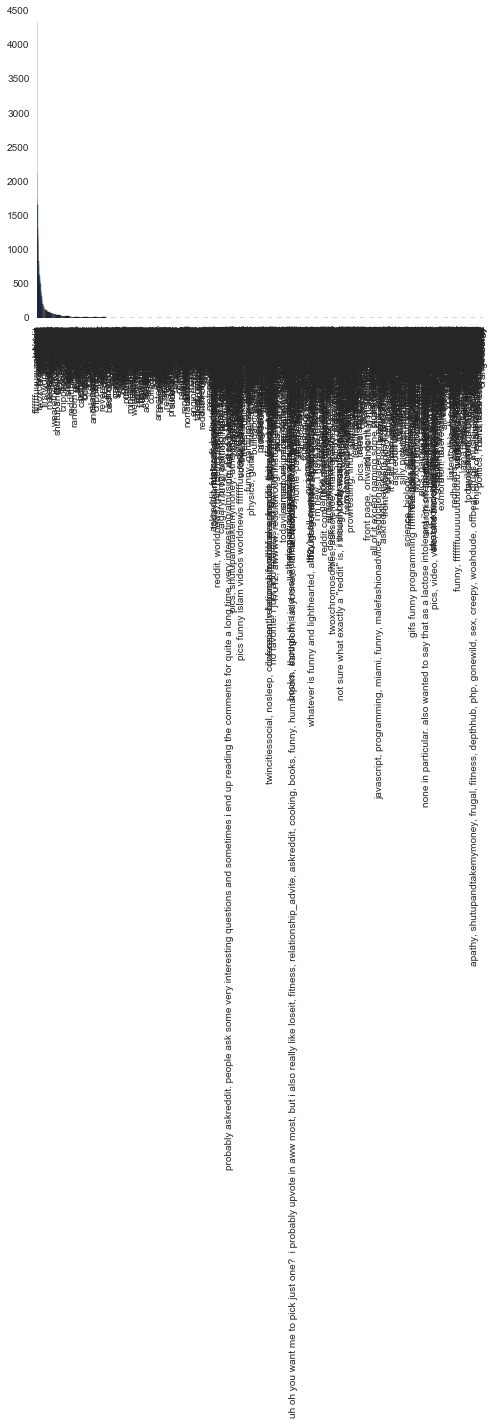

In [57]:
df.Subreddit_data_treated.value_counts().plot(kind='bar')

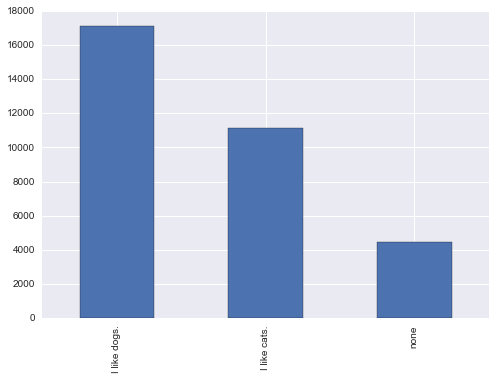

In [58]:
df.Dog_or_cat_person.value_counts().plot(kind='bar')

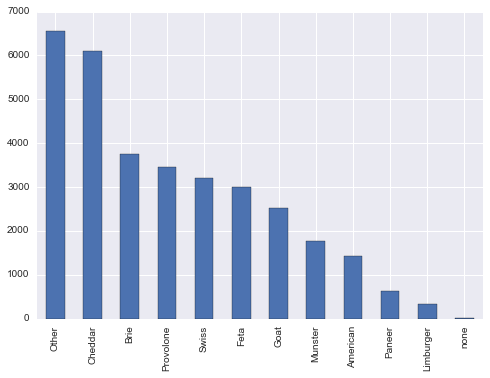

In [59]:
df.Cheese_type.value_counts().plot(kind='bar')

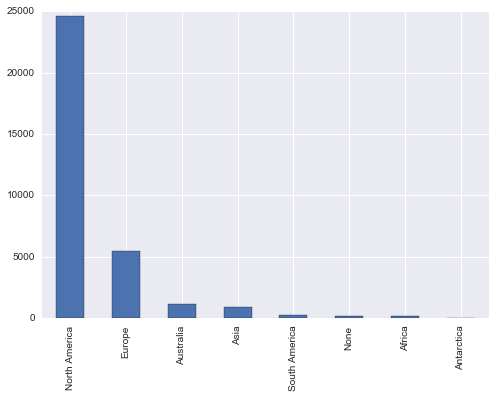

In [60]:
df.Continent.value_counts().plot(kind='bar')

In [61]:
del df['Entry_Id']

In [62]:
variables_num = list(df.dtypes[df.dtypes != "object"].index)
df[variables_num].head()

""
0
1
2
3
4


In [63]:
df.Marital_status.value_counts()

Single                                      10428
In a relationship                            9828
Forever Alone                                5850
Married/civil union/domestic partnership     5490
Engaged                                      1109
Widowed                                        44
Blank                                           5
Name: Marital_status, dtype: int64

In [64]:
df = df[ -(df.Marital_status == 'Blank')]
y=df['Marital_status']
df = df.drop(['Marital_status'], axis=1)

In [65]:
y = y.replace(to_replace=['Single', 'In a relationship', 'Forever Alone', 'Married/civil union/domestic partnership', 'Engaged', 'Widowed'], value=[0,1,2,3,4,5])

In [66]:
y.head()

5    3
6    1
7    3
8    3
9    1
Name: Marital_status, dtype: int64

In [67]:
df.columns

Index([u'Gender', u'Age_category', u'Employment_status', u'Military_service',
       u'Children_under_18', u'Education_Level', u'Yearly_Houshold_income',
       u'Subreddit_data_treated', u'Dog_or_cat_person', u'Cheese_type',
       u'Continent'],
      dtype='object')

In [68]:
del df["Subreddit_data_treated"]
del df["Dog_or_cat_person"]
del df["Cheese_type"]


In [69]:
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))
    
    
describe_categorical(df)

,Gender,Age_category,Employment_status,Military_service,Children_under_18,Education_Level,Yearly_Houshold_income,Continent
count,32749,32749,32749,32749,32749,32749,32749,32749
unique,3,8,7,2,3,8,9,8
top,Male,18-24,Employed full time,No,No,Bachelor's degree,"Under $20,000",North America
freq,26415,15801,14811,30526,27483,11042,7891,24591


In [72]:
categorical_variables = ['Gender','Age_category','Employment_status','Military_service','Children_under_18', 
                         'Education_Level','Yearly_Houshold_income', 'Continent']

In [73]:
for variable in categorical_variables:
    # Create array of dummies
    dummies = pd.get_dummies(df[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    df = pd.concat([df, dummies], axis=1)
    df.drop([variable], axis=1, inplace=True)

In [74]:
df.isnull().sum()

Gender_Female                                              0
Gender_Male                                                0
Gender_None                                                0
Age_category_18-24                                         0
Age_category_25-34                                         0
Age_category_35-44                                         0
Age_category_45-54                                         0
Age_category_55-64                                         0
Age_category_65 or Above                                   0
Age_category_None                                          0
Age_category_Under 18                                      0
Employment_status_Employed full time                       0
Employment_status_Freelance                                0
Employment_status_None                                     0
Employment_status_Not employed and not looking for work    0
Employment_status_Not employed, but looking for work       0
Employment_status_Retire

In [75]:
df.corr()

,Gender_Female,Gender_Male,Gender_None,Age_category_18-24,Age_category_25-34,Age_category_35-44,Age_category_45-54,Age_category_55-64,Age_category_65 or Above,Age_category_None,...,"Yearly_Houshold_income_Under $20,000",Yearly_Houshold_income_none,Continent_Africa,Continent_Antarctica,Continent_Asia,Continent_Australia,Continent_Europe,Continent_None,Continent_North America,Continent_South America
Gender_Female,1.000000,-0.980283,-0.037723,0.047602,-0.032738,-0.027090,0.009549,0.010535,0.017870,-0.008285,...,0.051836,-0.013174,-0.006452,-0.003751,-0.027581,-0.022340,-0.092401,-0.011348,0.107456,-0.021745
Gender_Male,-0.980283,1.000000,-0.160480,-0.040059,0.031854,0.027018,-0.008752,-0.009388,-0.020601,-0.067173,...,-0.049315,0.004769,0.007373,0.003827,0.027948,0.022498,0.091428,-0.019410,-0.101504,0.022085
Gender_None,-0.037723,-0.160480,1.000000,-0.035193,0.002439,-0.001316,-0.003440,-0.005149,0.014918,0.381090,...,-0.009537,0.041689,-0.005056,-0.000614,-0.003568,-0.002187,-0.000804,0.154841,-0.023440,-0.003072
Age_category_18-24,0.047602,-0.040059,-0.035193,1.000000,-0.713717,-0.262697,-0.120473,-0.063267,-0.041367,-0.050120,...,0.261441,0.019130,-0.010621,-0.007546,-0.035005,-0.007468,-0.000270,-0.017311,0.023756,-0.010984
Age_category_25-34,-0.032738,0.031854,0.002439,-0.713717,1.000000,-0.201102,-0.092225,-0.048433,-0.031668,-0.038368,...,-0.189267,-0.086331,0.011268,0.010573,0.040429,0.003980,0.001027,0.001388,-0.023719,0.017811
Age_category_35-44,-0.027090,0.027018,-0.001316,-0.262697,-0.201102,1.000000,-0.033945,-0.017827,-0.011656,-0.014122,...,-0.117490,-0.014643,0.001310,-0.002126,0.003245,0.008589,0.015738,-0.001109,-0.017215,-0.005706
Age_category_45-54,0.009549,-0.008752,-0.003440,-0.120473,-0.092225,-0.033945,1.000000,-0.008175,-0.005345,-0.006476,...,-0.055768,0.002576,-0.004148,-0.000975,-0.010225,-0.003452,-0.022828,-0.009756,0.028763,-0.006218
Age_category_55-64,0.010535,-0.009388,-0.005149,-0.063267,-0.048433,-0.017827,-0.008175,1.000000,-0.002807,-0.003401,...,-0.023785,-0.001954,0.003089,-0.000512,-0.005232,-0.002280,-0.018177,0.000899,0.019343,-0.006096
Age_category_65 or Above,0.017870,-0.020601,0.014918,-0.041367,-0.031668,-0.011656,-0.005345,-0.002807,1.000000,-0.002224,...,-0.007442,-0.006460,0.030677,-0.000335,-0.007177,-0.004267,-0.003973,0.005838,0.003213,-0.003986
Age_category_None,-0.008285,-0.067173,0.381090,-0.050120,-0.038368,-0.014122,-0.006476,-0.003401,-0.002224,1.000000,...,-0.014074,0.091697,-0.003340,-0.000406,-0.008696,0.006176,-0.004393,0.238820,-0.036931,-0.004829


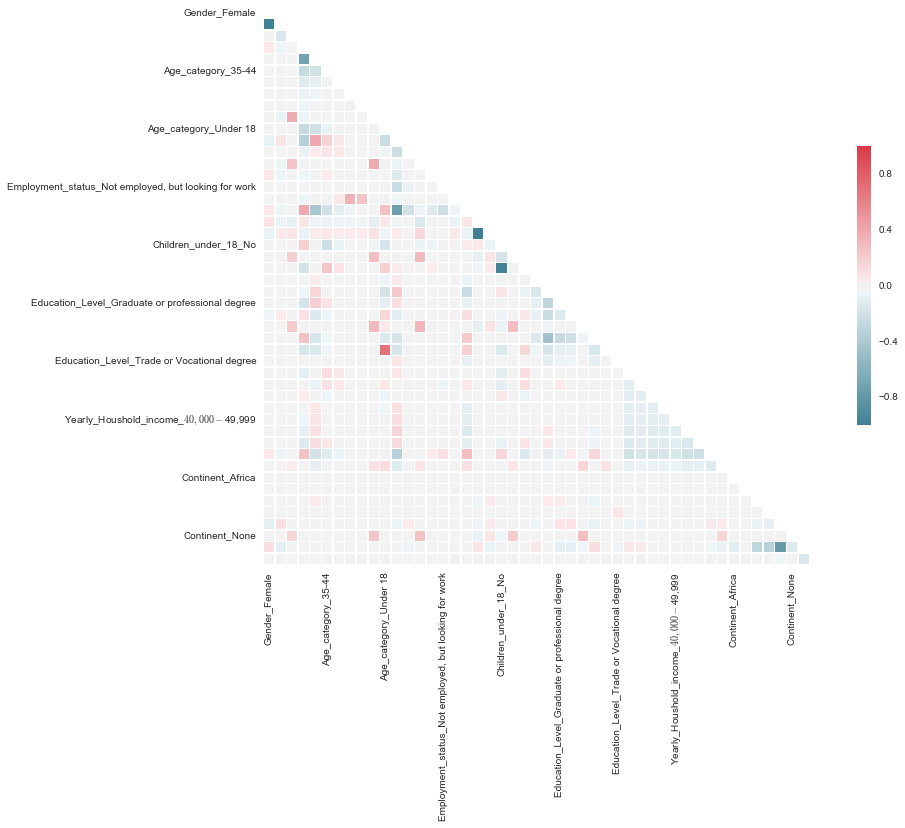

In [76]:
from string import letters
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="white")

#Lets calculate the corelation matrix 
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,square=True, 
            xticklabels=5, yticklabels=5,linewidths=.5, 
            cbar_kws={"shrink": .5}, ax=ax)

In [77]:
pred_train,pred_test,tar_train,tar_test=train_test_split(df,y,test_size=0.4)

In [78]:
pred_train.shape

(19649, 48)

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)
predictions=classifier.predict(pred_test)


In [80]:
predictions

array([4, 0, 1, ..., 0, 3, 0], dtype=int64)

In [81]:
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[2243, 1328,  385,  233,   18,    3],
       [1715, 1603,  237,  339,   15,    4],
       [1233,  660,  347,  116,   21,    1],
       [ 281,  524,   80, 1236,   34,    2],
       [ 125,  184,   18,   90,    4,    0],
       [   9,    3,    3,    6,    0,    0]])

In [82]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.41473282442748094

Accuracy:0.41473284